# Statistics Assignment 1

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
import collections
import math
import seaborn as sns
import numpy as np

In [2]:
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

# Common Function Definitions

In [3]:
def get_mean(arr) :
    return sum(arr) / len(arr)

In [4]:
def get_median(arr) :
    sorted_arr = sorted(arr)
    
    num_data = len(sorted_arr)
    
    if num_data % 2 == 0 :
        index = num_data // 2
        return (sorted_arr[index] + sorted_arr[index -1]) / 2

    return sorted_arr[num_data // 2]

In [5]:
def get_mode(arr) :
    data = collections.Counter(arr)
    data_list = dict(data)
    
    max_value = max(list(data.values()))
    
    modes = [num for num, freq in data_list.items() if freq == max_value]
    
    if len(modes) == len(arr):
        return []
    
    return modes

In [6]:
def get_std_deviation(arr) :
    mean = get_mean(arr)
    
    variance = sum([((x - mean) ** 2) for x in arr]) / len(arr)
    
    std_dev = variance ** 0.5
    
    return std_dev

## Calculation of Expectation and Variance from a Probability Distribution Table

#### Expectation is

$ E[X] = \sum _{x} xP(x) $


#### Calculating Variance
$ E[X ^{2} ] = \sum _{x} x ^{2} P(x) $

#### Option 1

$ Var(X) = E[X ^{2}] - (E[X]) ^{2} $

#### Option 2


$ Var(X) = E[(X - \mu)^{2}] $

$ E[(X - \mu) ^{2}] = \sum _{x} (x - \mu) ^{2} P(x)  $

therefore

$ Var(X) = \sum _{x} (x - \mu) ^{2} P(x)  $

In [7]:
def get_expectation(values, probabilities) :
    num_elems = len(values)
    
    assert(num_elems > 0)
    assert(num_elems == len(probabilities))
    assert(min(values) >= 0)
    assert(min(probabilities) >= 0)
    assert(sum(probabilities) == 1.0)
    
    mean = 0
    
    for i in range(num_elems):
        mean = mean + (values[i] * probabilities[i])
    
    return mean

In [8]:
def get_variance_1(values, probabilities) :
    num_elems = len(values)
    
    mean_of_x = get_expectation(values, probabilities)
    
    values_square = [x * x for x in values]
    
    mean_of_x_square = get_expectation(values_square, probabilities)
    
    variance = mean_of_x_square - (mean_of_x ** 2)
    
    return variance

def get_variance_2(values, probabilities) :
    num_elems = len(values)
    
    mean = get_expectation(values, probabilities)
    
    variance = 0
    
    for i in range(num_elems):
        variance = variance + (((values[i] - mean) ** 2) * probabilities[i])
    
    return variance

In [9]:
def get_ncr(n, r) :
    return math.factorial(n) / (math.factorial(r) * math.factorial(n-r))

In [10]:
def binomial_probability(total_trials, num_success, prob) :
    
    # (total_trials) C (num_success) * (prob ^ num_success) ((1 - prob) ^ (total_trials - num_success))
    
    return (get_ncr(total_trials, num_success)) * (prob ** num_success) * ((1 - prob) ** (total_trials - num_success))

In [11]:
def poisson_probability(mu, x) :
    return (math.exp(-1 * mu) * (mu ** x)) / (math.factorial(x))

***
***
***

# Problem Statement 1:

Calculate the mean, median, mode and standard deviation 


The marks awarded for an assignment set for a Year 8 class of 20 students were as follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [12]:
marks = [6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8]

len(marks)

20

In [13]:
# Solution OPTION 1 - Using basic python

mean    = get_mean(marks)
median  = get_median(marks) 
mode    = get_mode(marks)
std_dev = get_std_deviation(marks)

print(f" mean    : {mean}\n median  : {median}\n mode    : {mode}\n std_dev : {std_dev}")

 mean    : 6.85
 median  : 7.0
 mode    : [7]
 std_dev : 1.5898113095584647


In [14]:
# Solution OPTION 2 - Using Numpy and Scipy

mean    = np.mean(marks)
median  = np.median(marks)
mode    = stats.mode(marks)[0]
std_dev = np.std(marks)

print(f" mean    : {mean}\n median  : {median}\n mode    : {mode}\n std_dev : {std_dev}")

 mean    : 6.85
 median  : 7.0
 mode    : [7]
 std_dev : 1.5898113095584647


***
***
***

# Problem Statement 2:

Calculate the mean, median, mode and standard deviation for the problem

The number of calls from motorists per day for roadside service was recorded for a
particular month:
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [15]:
num_calls = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]

len(num_calls)

35

*** ERROR ***
<h2 style="color:red;">There are 35 entries.. a month can have at most 31 days</h2>

In [16]:
# Solution OPTION 1 - Using basic python

mean    = get_mean(num_calls)
median  = get_median(num_calls)
mode    = get_mode(num_calls)
std_dev = get_std_deviation(num_calls)

print(f" mean    : {mean}\n median  : {median}\n mode    : {mode}\n std_dev : {std_dev}")

 mean    : 107.51428571428572
 median  : 100
 mode    : [75]
 std_dev : 38.77287080168402


In [17]:
# Solution OPTION 2 - Using Numpy and Scipy

marks = [6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8]

mean    = np.mean(num_calls)
median  = np.median(num_calls)
mode    = stats.mode(num_calls)[0]
std_dev = np.std(num_calls)

print(f" mean    : {mean}\n median  : {median}\n mode    : {mode}\n std_dev : {std_dev}")

 mean    : 107.51428571428572
 median  : 100.0
 mode    : [75]
 std_dev : 38.77287080168403


***
***
***

# Problem Statement 3:

The number of times I go to the gym in weekdays, are given below along with its
associated probability:


| X | 0 | 1 | 2 | 3 | 4 | 5 |
| :- | --- | --- | --- | --- | --- | --- |
| f(x) |  0.09 | 0.15 | 0.40 | 0.25 | 0.10 | 0.01 |


Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.

In [18]:
values  = [0, 1, 2, 3, 4, 5]
probabilities = [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]

In [19]:
# Solution Option 1 - Using basic python

mean = get_expectation(values, probabilities)

print(f"The mean number of workouts in a week : {mean}")

variance1 = get_variance_1(values, probabilities)

print(f"The variance is : {variance1}")

variance2 = get_variance_2(values, probabilities)

#print(f"The variance is : {variance2}")

assert(variance1 == variance2)

The mean number of workouts in a week : 2.15
The variance is : 1.2275


In [20]:
# Solution Option 2 - Using Scipy

func = stats.rv_discrete(name='custm', values=(values, probabilities))

mean = func.expect()

print(f"The mean number of workouts in a week : {mean}")

variance = func.var()

print(f"The variance is : {variance}")

The mean number of workouts in a week : 2.15
The variance is : 1.2275


***
***
***

# Problem Statement 4:

Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet.

The target diameter to be achieved is 12.5 mm.

Random disturbances in the process often result in inaccuracy.

Historical data shows that the distribution of D can be modelled by the 

PDF(d) = $ 20 e ^{-20 (d - 12.5)} $, d ≥ 12.5.

If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts? 

What is the CDF when the diameter is of 11 mm? 

What is your conclusion regarding the proportion of scraps?

### If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts?

The propotion of the part will be

$ \int_{12.6} ^{\infty} 20 e ^{-20 (d - 12.5)} $


$ \int 20 e ^{-20 (d - 12.5)} = 20 e ^{250} \int e ^ {-20d} = 20 * e ^{250} * \frac {1}{-20} * e ^{-20d} + C = - e ^{250} * e ^{-20d} + C $

therefore 



$ \int_{12.6} ^{\infty} 20 e ^{-20 (d - 12.5)}  = (- e ^{250} * e ^{-20 * \infty }) - (- e ^{250} * e ^{-20 * 12.6}) = (e ^{250} * e ^{-20 * 12.6}) - (e ^{250} * e ^{-20 * \infty })$


$ = e ^{250} * e ^ {-250} $

$ = e ^ {-2} $

$ = 0.13533528323 $

**The answer is 0.13533528323**

### What is the CDF when the diameter is of 11 mm?

The PDF(d) = $ 20 e ^{-20 (d - 12.5)} $ is applicable for d ≥ 12.5

Therefore the PDF(d) for any d less than 12.5 is 0

**Since 11 is less than 12.5, the CDF when diameter is of 11mm is 0**

### What is your conclusion regarding the proportion of scraps?

0.13533528323 of the drilled items have to be scrapped because it they will have diameter over 12.6, which is unacceptable.

(1 - 0.13533528323), i.e 0.86466471677 of the drilled items will have diameter between 12.5 and 12.6 which is acceptable

***
***
***

# Problem Statement 5:

A company manufactures LED bulbs with a faulty rate of 30%.

If I randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?

Calculate the average value of this process. 

Also evaluate the standard deviation associated with it.

***
### Solution, option 1 - by hand

probability of 'success', ie faulty

p = 0.3

probability of 'failure', ie not faulty

q = 1 - p = 1 - 0.3 = 0.7

This is a binomial distribution (assuming large number of LED's to choose, since we are not replacing LED, and the probability remains same for each trial)

n = number of trials = 6

The probability distribution of a binomial distribution is

$ P(X=r) = \binom{n}{r} p ^r q^{(n-r)} $

$ P(2) = \frac{6!}{4! 2!} (0.3) ^{2} (0.7) ^{4} $

$ = \frac{6 * 5}{2} (0.09) (0.24) $

= 15 * 0.09 * 0.24

= .3241

**Therefore the probability of having 2 faulty LED's is 0.3241**


The expectation (ie, mean) E(X) = np

**E(X) = 6 * 0.3 = 1.8**

The variance Var(X) = npq

**Var(X) = 6 * 0.3 * 0.7 = 1.26**
***

### Solution, option 2 - Using scipy

In [21]:
print(f"The probability of 2 faulty LEDs from a sample of 6 is {binom.pmf(k=2,n=6,p=0.3)}")

expectation, variance = binom.stats(n=6, p=0.3)

print(f"The expectation is {expectation}")
print(f"The variance is {variance}")

The probability of 2 faulty LEDs from a sample of 6 is 0.32413499999999995
The expectation is 1.7999999999999998
The variance is 1.2599999999999998


***
***
***

# Problem Statement 6:

Gaurav and Barakha are both preparing for entrance exams. 

Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. 

What is the probability that each of them will solve 5 questions correctly? 

What happens in cases of 4 and 6 correct solutions? 

What do you infer from it? 

What are the two main governing factors affecting their ability to solve questions correctly? 

Give a pictorial representation of the same to validate your answer.

### What is the probability that each of them will solve 5 questions correctly?

In [22]:
gaurav_5_correct = binomial_probability(8, 5, 0.75)

bharka_5_correct = binomial_probability(12, 5, 0.45)

print(f"The probability that each of them will solve 5 questions correctly = {gaurav_5_correct * bharka_5_correct}")

The probability that each of them will solve 5 questions correctly = 0.046199890572992175


### What happens in cases of Gaurav solves 4 and Bharka solves 6 correctly?

In [23]:
gaurav_4_correct = binomial_probability(8, 4, 0.75)

bharka_6_correct = binomial_probability(12, 6, 0.45)

print("The probability that Gaurav will solve 4 questions and Bharka 6 questions correctly = "
      f"{gaurav_4_correct * bharka_6_correct}")

The probability that Gaurav will solve 4 questions and Bharka 6 questions correctly = 0.018374956477894614


### What is the probability that each of them will solve 4 questions correctly?

In [24]:
gaurav_4_correct = binomial_probability(8, 4, 0.75)

bharka_4_correct = binomial_probability(12, 4, 0.45)

print("The probability that both Gaurav and Bharka solve 4 questions correctly = "
      f"{gaurav_4_correct * bharka_4_correct}")

The probability that both Gaurav and Bharka solve 4 questions correctly = 0.014704826281913018


### What is the probability that each of them will solve 6 questions correctly?

In [25]:
gaurav_6_correct = binomial_probability(8, 6, 0.75)

bharka_6_correct = binomial_probability(12, 6, 0.45)

print("The probability that both Gaurav and Bharka solve 6 questions correctly = "
      f"{gaurav_6_correct * bharka_6_correct}")

The probability that both Gaurav and Bharka solve 6 questions correctly = 0.0661498433204206


***

### What do you infer from it?

Gaurav averages 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%.

So expectation of correct answer for Gaurav is 75 % of 8, which is 6

and expectation of correct answer for Barkha is 45 % of 12, which is 5.8 (which is closer to 6)


We got the following probabilities

The probability that each of them will solve 6 questions correctly = 0.0661498433204206
The probability that each of them will solve 5 questions correctly = 0.046199890572992175
The probability that each of them will solve 4 questions correctly = 0.014704826281913018

So probability that they will solve 6 questions > solving 5 questions > solving 4 questions

***

### What are the two main governing factors affecting their ability to solve questions correctly?

1) the correction rate - higher the correction rate, more they will answer questions correctly
2) the number of questions being attempted - more questions they attempt, more they will answer correctly

***

### Give a pictorial representation of the same to validate your answer.

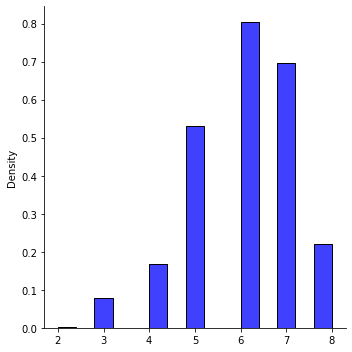

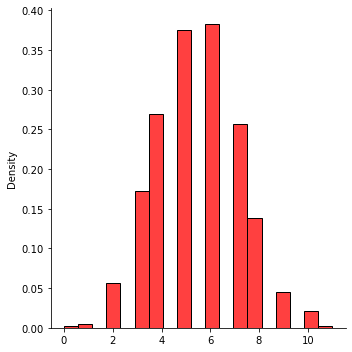

In [26]:
gaurav_data = np.random.binomial(n=8,  p=0.75, size=1000)
bharka_data = np.random.binomial(n=12, p=0.45, size=1000)

sns.displot(gaurav_data, stat="density", color='blue')
sns.displot(bharka_data, stat="density", color='red')

***
***
***

# Problem Statement 7:

Customers arrive at a rate of 72 per hour to my shop. 

What is the probability of k customers arriving in 4 minutes? 

a) 5 customers,

b) not more than 3 customers,

c) more than 3 customers. 

Give a pictorial representation of the same to validate your answer.

### Solution

Rate of arrival of customers = 72 per hour = 72 per 60 minutes = 1.2 customer per minute

$\lambda $ is the Poisson Process Rate or the mean number of occurances of the event per unit time.

$\lambda = 1.2 $

$\mu $ is the the mean number of occurances of the event in the specified time.

$ \mu = 1.2 * 4 = 4.8 $

This is a Poisson distribution with mean number of successes ($\mu\$) that occurs in the specified region

$ P(X = x| \mu) = \frac {e ^ {-\mu} (\mu ^{x})} {x!} $

In [27]:
customers_per_hour = 72

process_rate = 72 / 60 # customers per minute

required_time = 4 # minutes

mean = process_rate * required_time

In [28]:
# a) 5 customers,

print(f"Using basic Python - Probability of 5 customers arriving in 4 minutes = {poisson_probability(mean, 5)}")

# Using Scipy
print(f"\nUsing Scipy - Probability of 5 customers arriving in 4 minutes = {poisson.pmf(5, mean)}")

Using basic Python - Probability of 5 customers arriving in 4 minutes = 0.17474768364388282

Using Scipy - Probability of 5 customers arriving in 4 minutes = 0.17474768364388296


In [29]:
# b) not more than 3 customers

p_0 = poisson_probability(mean, 0)
p_1 = poisson_probability(mean, 1)
p_2 = poisson_probability(mean, 2)
p_3 = poisson_probability(mean, 3)

p_not_more_than_3 = p_0 + p_1 + p_2 + p_3

print(f"Using basic Python - Probability of not more than 3 customers arriving in 4 minutes = {p_not_more_than_3}")

# Using Scipy
print(f"\nUsing Scipy - Probability of not more than 3 customers arriving in 4 minutes = {poisson.cdf(3, mean)}")

Using basic Python - Probability of not more than 3 customers arriving in 4 minutes = 0.2942299164965641

Using Scipy - Probability of not more than 3 customers arriving in 4 minutes = 0.2942299164965642


In [30]:
# c) more than 3 customers. 

p_0 = poisson_probability(mean, 0)
p_1 = poisson_probability(mean, 1)
p_2 = poisson_probability(mean, 2)
p_3 = poisson_probability(mean, 3)

p_more_than_3 = 1 - (p_0 + p_1 + p_2 + p_3)

print(f"Using basic Python - Probability of more than 3 customers arriving in 4 minutes = {p_more_than_3}")

# Using Scipy
print(f"\nUsing Scipy - Probability of more than 3 customers arriving in 4 minutes = {1 - poisson.cdf(3, mean)}")

Using basic Python - Probability of more than 3 customers arriving in 4 minutes = 0.705770083503436

Using Scipy - Probability of more than 3 customers arriving in 4 minutes = 0.7057700835034357


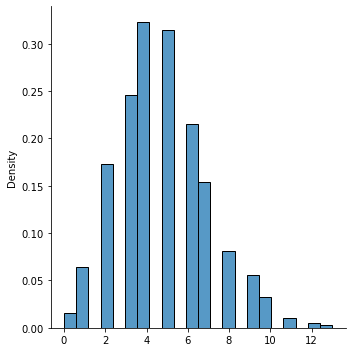

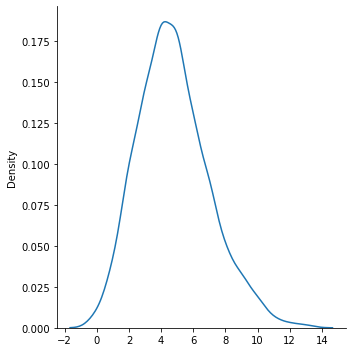

In [31]:
r = poisson.rvs(mean, size=1000)

sns.displot(r, stat="density")
sns.displot(r, kind="kde")

The mean is 4.8. From the figure, the highest density is for the bin 4.

If we look at the density graph, it is skewed to the right. The area of the curve from 0 to 3 is less then the area from 3 to 14.

***
***
***

# Problem Statement 8:

I work as a data analyst in Aeon Learning Pvt. Ltd. 

After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour. 

What is the probability that I will commit 2 errors in a 455-word financial report?

What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?

How is the λ affected?

How does it influence the PMF?

Give a pictorial representation of the same to validate your answer.

In [32]:
# This is a Poisson Distribution

words_per_minute = 77
errors_per_hour = 6
errors_per_minute = 6 / 60
errors_per_word = errors_per_minute / words_per_minute

print(f"Errors per 100 words : {errors_per_word * 100}")

Errors per 100 words : 0.12987012987012986


### What is the probability of 2 errors in a 455-word financial report?

In [33]:
mean = errors_per_word * 455

print(f"Using basic Python - Probability of 2 errors in a 455 word report = {poisson_probability(mean, 2)}")

# Using Scipy
print(f"\nUsing Scipy - Probability of 2 errors in a 455 word report = {poisson.pmf(2, mean)}")

Using basic Python - Probability of 2 errors in a 455 word report = 0.09669027375144446

Using Scipy - Probability of 2 errors in a 455 word report = 0.09669027375144444


### What is the probability of 2 errors in a 1000-word financial report?

In [34]:
mean = errors_per_word * 1000

print(f"Using basic Python - Probability of 2 errors in a 455 word report = {poisson_probability(mean, 2)}")

# Using Scipy
print(f"\nUsing Scipy - Probability of 2 errors in a 455 word report = {poisson.pmf(2, mean)}")

Using basic Python - Probability of 2 errors in a 455 word report = 0.23012815007300153

Using Scipy - Probability of 2 errors in a 455 word report = 0.23012815007300153


### What is the probability of 2 errors in a 255-word financial report?

In [35]:
mean = errors_per_word * 255

print(f"Using basic Python - Probability of 2 errors in a 455 word report = {poisson_probability(mean, 2)}")

# Using Scipy
print(f"\nUsing Scipy - Probability of 2 errors in a 455 word report = {poisson.pmf(2, mean)}")

Using basic Python - Probability of 2 errors in a 455 word report = 0.039377135392854104

Using Scipy - Probability of 2 errors in a 455 word report = 0.039377135392854104


### How is the λ  affected?



The λ remains same ie, 6 errors per hour OR (6 / (60 *77) errors per word

### How does it influence the PMF?



$\lambda $ is the Poisson Process Rate or the mean number of occurances of the event per unit time / space etc.

$\mu $ is the the mean number of occurances of the event in the specified time/ space etc.

$ \mu = \lambda $ * (number of words in the report)


The probablity mass function of Poisson Distribution is given by

$ P(X = x| \mu) = \frac {e ^ {-\mu} (\mu ^{x})} {x!} $

### Give a pictorial representation of the same to validate your answer.

In [36]:
## TO DO

***
***
***

# Problem Statement 9:

Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF, f(d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm?
What is the conclusion of this experiment?

<h2 style="color:red;">Isn't this problem same as Problem Statement 4?</h2>

***
***
***

# Problem Statement 10:

Please compute the following:

a) P(Z > 1.26), P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), P(Z ≤ −4.6)

b) Find the value z such that P(Z > z) = 0.05

c) Find the value of z such that P(−z < Z < z) = 0.99

# Option 1 - Using z tables, followed by Option 2 - Using scipy

### a.1) P(Z > 1.26)

from z table, value of 1.26 is .8962

**so P(Z > 1.26) = 1 - .8962 = .1038**

****

In [37]:
print(f"P(Z > 1.26) = {1 - stats.norm.cdf(1.26)}")

P(Z > 1.26) = 0.10383468112130045


***

### a.2) P(Z < −0.86)

from z table, value of -0.86 is .1949

**so P(Z < −0.86) is .1949**

***

In [38]:
print(f"P(Z > −0.86) = {stats.norm.cdf(- 0.86)}")

P(Z > −0.86) = 0.1948945212518084


***

### a.3) P(Z > −1.37)

from z table, value of 1.37 is .0853

**so P(Z > −1.37) is 1 - .0853 = .9147**

***

In [39]:
print(f"P(Z > -1.37) = {1 - stats.norm.cdf(-1.37)}")

P(Z > -1.37) = 0.914656549178033


***

### a.4) P(−1.25 < Z < 0.37)

from z table, value of -1.25 is .1056
from z table, value of 0.37 is .6443

**So P(−1.25 < Z < 0.37) is .6443 - .1056 = .5387**

***

In [40]:
print(f"P(−1.25 < Z < 0.37) = {stats.norm.cdf(0.37) - stats.norm.cdf(-1.25)}")

P(−1.25 < Z < 0.37) = 0.5386589811336914


***

### a.5) P(Z ≤ −4.6)

from z table, the least z value is -3.49 which is .0002

**so P(Z ≤ −4.6) is very close to 0**

***

In [41]:
print(f"P(Z ≤ −4.6) = {stats.norm.cdf(-4.6)}")

P(Z ≤ −4.6) = 2.1124547025028537e-06


***

### b) Find the value z such that P(Z > z) = 0.05

From Z table, P(-1.64) = .0505 and P(-1.65) = .0495

**So value of z such that P(Z > z) = 0.05 is -1.645**

***

In [42]:
print(f"value of z such that P(Z > z) = 0.05 is {stats.norm.ppf(0.05)}")

value of z such that P(Z > z) = 0.05 is -1.6448536269514729


### c) Find the value of z such that P(−z < Z < z) = 0.99

We need to find z such that its probability is (1 - 0.99) / 2 = 0.01 / 2 = 0.05

From Z table, the value of -2.57 is .0051

**value of z such that P(−z < Z < z) = 0.99 is -2.57**

***

In [43]:
print(f"value of z such that P(−z < Z < z) = 0.99 is {stats.norm.ppf((1 - 0.99)/ 2)}")

value of z such that P(−z < Z < z) = 0.99 is -2.5758293035489004


***
***
***

# Problem Statement 11:

The current flow in a copper wire follow a normal distribution with a mean of 10 mA and a variance of 4 $ (mA) ^{2} $.

What is the probability that a current measurement will exceed 13 mA? 

What is the probability that a current measurement is between 9 and 11 mA? 

Determine the current measurement which has a probability of 0.98.

In [44]:
mean = 10
variance = 4
std_deviation = variance ** 0.5

z = (13 - mean) / std_deviation

print(f"Probability that a current measurement will exceed 13 mA = {1 - stats.norm.cdf(z)}")

z1 = (9 - mean) / std_deviation
z2 = (11 - mean) / std_deviation

print(f"\nProbability that a current measurement  is between 9 and 11 mA = {stats.norm.cdf(z2) - stats.norm.cdf(z1)}")

z3 = stats.norm.ppf(0.98)

current = (z3 * std_deviation) + mean

print(f"\nSince this is a continuous probability distribution, probability of a given value is 0. So we cannot find out 'the current measurement which has a probability of 0.98'")

print(f"\nProbability that a current measurement is below {current} mA = 0.98")

Probability that a current measurement will exceed 13 mA = 0.06680720126885809

Probability that a current measurement  is between 9 and 11 mA = 0.38292492254802624

Since this is a continuous probability distribution, probability of a given value is 0. So we cannot find out 'the current measurement which has a probability of 0.98'

Probability that a current measurement is below 14.107497821263646 mA = 0.98


***
***
***

# Problem Statement 12:

The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. 

The specifications of the shaft are 0.2500 ∓ 0.0015 inch. 

What proportion of shafts are in sync with the specifications? 

If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? 

What is your conclusion from this experiment?

***
## What proportion of shafts are in sync with the specifications?

In [45]:
mean = 0.2508
std_deviation = 0.0005

shaft_min = 0.25 - 0.0015
shaft_max = 0.25 + 0.0015

z_min = (shaft_min - mean) / std_deviation
z_max = (shaft_max - mean) / std_deviation

print(f"\nProportion of shafts are in sync with the specifications = {stats.norm.cdf(z_max) - stats.norm.cdf(z_min)}")


Proportion of shafts are in sync with the specifications = 0.91924122831152


## If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications?


In [46]:
mean = 0.2500
std_deviation = 0.0005

shaft_min = 0.25 - 0.0015
shaft_max = 0.25 + 0.0015

z_min = (shaft_min - mean) / std_deviation
z_max = (shaft_max - mean) / std_deviation

print(f"\nProportion of shafts are in sync with the specifications = {stats.norm.cdf(z_max) - stats.norm.cdf(z_min)}")


Proportion of shafts are in sync with the specifications = 0.9973002039367398


## What is your conclusion from this experiment?
mean = 0.2500
std_deviation = 0.0005

∓ 0.0015 inch therefore means 3 standard deviations from the mean.

so 99.7% falls in between 3 standard deviations from the mean